In [1]:
import os
import sys
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join("data", "train_data.csv"))

In [3]:
known_categories = {}

In [12]:
# race
known_categories['race']['type'] = "category"
known_categories['race']['mapping'] = {
    'caucasian': 'white',
    'euro': 'white',
    'black': 'black',
    'other': 'other',
    'white': 'white',
    'africanamerican': 'black',
    'afro american': 'black',
    'african american': 'black',
    '?': np.nan,
    'european': 'white',
    'asian': 'asian',
    'hispanic': 'hispanic',
    'latino': 'hispanic',
}

# gender
known_categories['gender']['type'] = "category"
known_categories['gender']['mapping'] = {
    'female': 'female',
    'male': 'male',
    'unknown/invalid': np.nan
}

# age
known_categories['age']['type'] = "Int64"
known_categories['age']['mapping'] = {
    '[0-10)': 0,
    '[10-20)': 10,
    '[20-30)': 20,
    '[30-40)': 30,
    '[40-50)': 40,
    '[50-60)': 50,
    '[60-70)': 60,
    '[70-80)': 70,
    '[80-90)': 80,
    '[90-100)': 90
}

# weight
known_categories['weight']['type'] = "Int64"
known_categories['weight']['mapping'] = {
    '>200': 200,
    '?': np.nan,
    '[0-25)': 0,
    '[100-125)': 100,
    '[125-150)': 125,
    '[150-175)': 150,
    '[175-200)': 175,
    '[25-50)': 25,
    '[50-75)': 50,
    '[75-100)': 75
}


# admission_type_code
known_categories['admission_type_code']['type'] = "category"
known_categories['admission_type_code']['mapping'] = {
    '1': 'Emergency',
    '2': 'Urgent', # Isn't urgent the same as emergency?? Assuming, urgent is the same as emergency
    '3': 'Elective',
    '4': 'Newborn',
    '5': np.nan, # 'Not Available',
    '6': np.nan, # 'NULL'
    '7': 'Trauma Center',
    '8': np.nan # 'Not Mapped'
}

# discharge_disposition_code
known_categories['discharge_disposition_code']['type'] = "category"
known_categories['discharge_disposition_code']['mapping'] = {
    '1': 'Discharged to home',
    '2': 'Discharged/transferred to another short term hospital',
    '3': 'Discharged/transferred to SNF',
    '4': 'Discharged/transferred to ICF',
    '5': 'Discharged/transferred to another type of inpatient care institution',
    '6': 'Discharged/transferred to home with home health service',
    '7': 'Left AMA',
    '8': 'Discharged/transferred to home under care of Home IV provider',
    '9': 'Admitted as an inpatient to this hospital',
    '10': 'Neonate discharged to another hospital for neonatal aftercare',
    '11': 'Expired',
    '12': 'Still patient or expected to return for outpatient services',
    '13': 'Hospice / home',
    '14': 'Hospice / medical facility',
    '15': 'Discharged/transferred within this institution to Medicare approved swing bed',
    '16': 'Discharged/transferred/referred another institution for outpatient services',
    '17': 'Discharged/transferred/referred to this institution for outpatient services',
    '18': np.nan, #'NULL',
    '19': 'Expired at home. Medicaid only: hospice',
    '20': 'Expired in a medical facility. Medicaid only: hospice',
    '21': 'Expired: place unknown. Medicaid only: hospice',
    '22': 'Discharged/transferred to another rehab fac including rehab units of a hospital',
    '23': 'Discharged/transferred to a long term care hospital',
    '24': 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
    '25': np.nan, #'Not Mapped',
    '26': np.nan, #'Unknown/Invalid',
    '30': 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
    '27': 'Discharged/transferred to a federal health care facility',
    '28': 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    '29': 'Discharged/transferred to a Critical Access Hospital (CAH)',
}

# admission_source_code
known_categories['admission_source_code']['type'] = "category"
known_categories['admission_source_code']['mapping'] = {
    '1': 'Physician Referral',
    '2': 'Clinic Referral',
    '3': 'HMO Referral',
    '4': 'Transfer from a hospital',
    '5': 'Transfer from a Skilled Nursing Facility (SNF)',
    '6': 'Transfer from another health care facility',
    '7': 'Emergency Room',
    '8': 'Court/Law Enforcement',
    '9': np.nan, #'Not Available',
    '10': 'Transfer from critial access hospital',
    '11': 'Normal Delivery',
    '12': 'Premature Delivery',
    '13': 'Sick Baby',
    '14': 'Extramural Birth',
    '15': np.nan, # 'Not Available',
    '17': np.nan, # 'NULL',
    '18': 'Transfer From Another Home Health Agency',
    '19': 'Readmission to Same Home Health Agency',
    '20': np.nan, # 'Not Mapped',
    '21': np.nan, #'Unknown/Invalid',
    '22': 'Transfer from hospital inpt/same fac reslt in a sep claim',
    '23': 'Born inside this hospital',
    '24': 'Born outside this hospital',
    '25': 'Transfer from Ambulatory Surgery Center',
    '26': 'Transfer from Hospice',
}

# payer_code
known_categories['payer_code']['type'] = "category"
known_categories['payer_code']['mapping'] = {
    '?': np.nan,
    'bc': 'BC',
    'ch': 'CH',
    'cm': 'CM',
    'cp': 'CP',
    'dm': 'DM',
    'fr': 'FR',
    'hm': 'HM',
    'mc': 'MC',
    'md': 'MD',
    'mp': 'MP',
    'og': 'OG',
    'ot': 'OT',
    'po': 'PO',
    'si': 'SI',
    'sp': 'SP',
    'un': 'UN',
    'wc': 'WC'
}

# medical_specialty
# TODO


# complete_vaccination_status
known_categories['complete_vaccination_status']['type'] = pd.CategoricalDtype(['none', 'incomplete', 'complete'], ordered=True)
known_categories['complete_vaccination_status']['mapping'] = {
    'none': 'none',
    'incomplete': 'incomplete',
    'complete': 'complete'
}

# diag_1, diag_2, diag_3
# TODO

known_categories['blood_type']['type'] = "category"
known_categories['blood_type']['mapping'] = {
    'a+': 'A+',
    'a-': 'A-',
    'ab+': 'AB+',
    'ab-': 'AB-',
    'b+': 'B+',
    'b-': 'B-',
    'o+': 'O+',
    'o-': 'O-',
}

# max_glu_serum
known_categories['max_glu_serum']['type'] = "category"
known_categories['max_glu_serum']['mapping'] = {
    '>200': '>200',
    '>300': '>300',
    'norm': 'normal',
    'none': np.nan
}

# A1Cresult
known_categories['A1Cresult']['type'] = "category"
known_categories['A1Cresult']['mapping'] = {
    '>7': '>7',
    '>8': '>8',
    'norm': 'normal',
    'none': np.nan
}

# diuretics
known_categories['diuretics']['type'] = "bool"
known_categories['diuretics']['mapping'] = {
    'yes': True,
    'no': False
}

# insulin
known_categories['insulin']['type'] = "bool"
known_categories['insulin']['mapping'] = {
    'yes': True,
    'no': False
}

# change
known_categories['change']['type'] = "bool"
known_categories['change']['mapping'] = {
    'ch': True,
    'no': False
}

# diabetesMed
known_categories['diabetesMed']['type'] = "bool"
known_categories['diabetesMed']['mapping'] = {
    'yes': True,
    'no': False
}

# readmitted
known_categories['readmitted']['type'] = "bool"
known_categories['readmitted']['mapping'] = {
    'yes': True,
    'no': False
}

In [20]:
# Required preprocessing so that the mappings work correctly
df['admission_type_code'] = df['admission_type_code'].astype("Int64")
df['discharge_disposition_code'] = df['discharge_disposition_code'].astype("Int64")
df['admission_source_code'] = df['admission_source_code'].astype("Int64")

df_clean = df.copy()


def get_mapping(value, column):
    try:
        return known_categories[column][str(value).lower()]
    except:
        return np.nan
    
def get_type(column):
    return known_categories[column]['type']


for column in known_categories.keys():
    df_clean[column] = (df[column]
                        .apply(lambda value: get_mapping(value, column))
                        .astype(get_type(column))
                       )

In [22]:
df.admission_type_code.value_counts()

1    42562
3    14884
2    14576
6     4182
5     3768
8      254
7       16
4        8
Name: admission_type_code, dtype: Int64

In [23]:
df_clean.admission_type_code.value_counts()

Emergency        42562
Elective         14884
Urgent           14576
Trauma Center       16
Newborn              8
Name: admission_type_code, dtype: int64

In [32]:
df_clean['medical_specialty'] = df_clean.medical_specialty.apply(lambda x: None if x == '?' else x)

In [33]:
df_clean.medical_specialty.value_counts()

InternalMedicine          11712
Emergency/Trauma           6021
Family/GeneralPractice     5939
Cardiology                 4273
Surgery-General            2473
                          ...  
SportsMedicine                1
Speech                        1
Psychiatry-Addictive          1
Neurophysiology               1
Perinatology                  1
Name: medical_specialty, Length: 70, dtype: int64

In [34]:
ProfileReport(df_clean, title="Fix missing values").to_file("reports/fix_missing_values.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/rafael.gil/.virtualenvs/capstone/lib/python3.7/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/rafael.gil/.virtualenvs/capstone/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:61: UserWarning: There was an attempt to calculate the phi_k correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"phi_k": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  (include the error message: '{error}')"""


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
df_readmitted = df_clean[df_clean.readmitted == True]

In [30]:
df_readmitted.shape

(9072, 34)

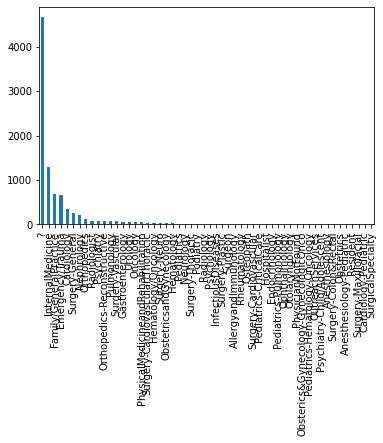

In [31]:
df_readmitted.medical_specialty.value_counts().plot(kind='bar');